In this lab we learned and ran different type of regresion on random data, trying each manually and then with a library.

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set random seed for reproducibility
np.random.seed(42)


In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

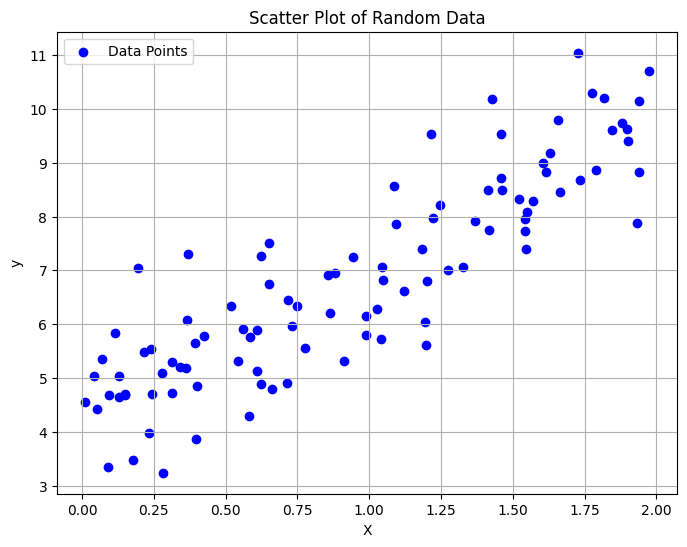

In [3]:
#plot your data here
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Random Data')
plt.grid(True)
plt.legend()
plt.show()


For your lab submission, answer questions in markdown cells and code.
1. Why does this random scatter plot of points have a linear relationship?

2. We added a bit of gaussian noise- where is this happening and why do you think we do this?


##1. Why does this random scatter plot of points have a linear relationship?

 This random scatter plot of points has a linear relationship because the data was generated using the linear equation of y = 3X + 4 + random noise. 3 is the slope coeffecint, 4 is the y intercept, and the random noise introduces some variation around the line to simulate real world data. The deviation is random but has a magnitude and direction up or down. Uses noraml distrubution



##2. We added a bit of gaussian noise- where is this happening and why do you think we do this?

  The guassian noise simulates real world imperfections. It is added to the linear relationship and seems to maake the data points scatter vertically around the linear line. If there was no noise it would just be a perfectly straight line following the linear equation.
   

Let's compute our prediction using the Normal Equation (closed form) so we call our predition $\hat{\theta}$ pronounced theta hat

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

3. what does np.c_ do? (show a tiny sample code explaining this syntax)
4. Rewrite the np-style formula into mathematical notation (just translate it into X_b's and y- practice your LaTeX)

##3. what does np.c_ do? (show a tiny sample code explaining this syntax)
np.c concatenates (joins) arrays column-wise and transforms slices into columns.

In [5]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Using np.c_ to concatenate
combined = np.c_[a, b]
combined

array([[1, 4],
       [2, 5],
       [3, 6]])

##4. Rewrite the np-style formula into mathematical notation (just translate it into X_b's and y- practice your LaTeX)

$θ=(X_b^TX_b)^{−1}X_b^Ty$

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

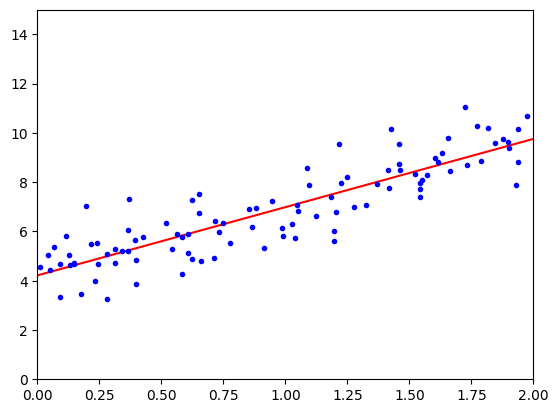

In [8]:
# plot this model’s predictions:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression #import library
lin_reg = LinearRegression() #instantiate model
lin_reg.fit(X, y) # Fit model
lin_reg.intercept_, lin_reg.coef_ #access intercept and coeffecients
lin_reg.predict(X_new) #make predictions


array([[4.21509616],
       [9.75532293]])

##5. What differences do you notice in the sci-kit learn method? Explain below what each step is doing in the code above.

The scikit-learn method uses the LinearRegression class, which abstracts away the details of the matrix operations involved in fitting the model. It directly provides methods like fit(), predict(), and properties like intercept_ and coef_, making it easier to use without dealing with the mathematical implementation explicitly.  

The numpy apporach invoves explicit matric operations and requires and understanding of linear algebra. In contrast, the sci-kit learn method abstracts those details away and makes the code more readable and easier to use. Scikit learn in also optimized for performance and stability while doing direct inversions can lead to issues since not all matricies are invertible.

For the Numpy method: The first step adds the intercept to the matrix X ( a column of ones), then theta best calculates the best fit parameters (weights). It uses the normal equation which computes the dot product of X_b transposed and X_b, then np.linalg.inv takes the inverse of the product, and then its multiplied by the transposed of X_b and vector y. It gives a vector of parameters where the first element is the intercept and the rest are coeffecients for the preductors. The next step is to make predictions. So a new X is generaated and the matrix multiplication is performed with theta_best to get predictions. The results are then plotted.

For the Scikit-Learn Method. An instance of LinearRegression is created and then fit to the data using the least squares approach. Once the linear regression is fit to the data, the intercepts and coeffecients are accessed through their attributes. Then the predict attribute is is used to make predictions on new data.

##6. Below we look at our first metric, Mean Squared Error. What is MSE? What does it measure? What is RMSE?

Mean Squared Error (MSE) is the average of squares of the error. It is calculated by squaring the differences between predicted and actual values and then averaging those squares. (I had to memorize these types of formulas for my analytical chemistry course - in a lot more detail) It quantifies the average square difference between the predicted values and whats observed. It places more weight on larger errors because you square the differencs. So its very sensitive to larger errors.

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$

where n is the number of data points, $\hat{y}_i$ is the predicted value, and $y_i$ is the actual value.


Root Mean Squared Error (RMSE) is the square root of the MSE and measures the standard deviation of the erros between the predicted and observed values. It provides an idea of how closly the predicted values matech the actual values, with lower values indicating a better fit. It is more easily interperable than the MSE and gives an idea of how much error the system typically makes in its predictions.

$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2}$

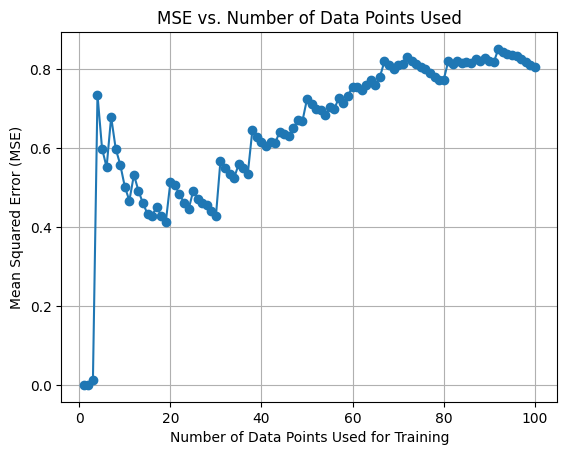

In [10]:
# Generate random data, this is the same equation as above
from sklearn.metrics import mean_squared_error
# Initialize lists to store MSE and model parameters
mse_list = []
theta_list = []

# Fit linear regression model and calculate MSE for each iteration
for i in range(1, 101):  # Iterate 100 times
    lin_reg = LinearRegression()
    lin_reg.fit(X[:i], y[:i])  # Fit model using the first i data points

    # Make predictions
    y_pred = lin_reg.predict(X[:i])

    # Calculate MSE
    mse = mean_squared_error(y[:i], y_pred)
    mse_list.append(mse)
    theta_list.append(lin_reg.coef_[0][0])  # Store the slope parameter

# Plot MSE over iterations
plt.plot(range(1, 101), mse_list, marker='o')
plt.xlabel('Number of Data Points Used for Training')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Data Points Used')
plt.grid(True)
plt.show()


In [11]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8065845639670531


##7. How can you interpret the calculation of MSE above? What does the plot above tell us about the MSE of our linear regression?

Initially, the plot startes with a very high MES when there is a very low number of data points used - which is expected as its highly variable and not well generalized. Then theres a sharp decline as more data is added, showing that the model starts to find the trend better and reduces the preduction error. Then, as you increase the nimber of data points it seems to start to stablizie with little flucturation but some noise. Towards to end of the plot with 100 data points used the MSE seesms to stablizes at a lower value of 0.86. The plot suggests that the model benefits from more data initially but as more data is used the imporvment stabilizes and increasing the number of data poitns doesnt sharply change the MSE. The final MSE value of 0.861 shows that the model fits the data relativly well as it is close to 0.

## Gradient Descent


Gradient Descent is a generic optimization algorithm capable of finding solutions to many problems. The general idea
of Gradient Descet is to tweak parameters iteratively in order to minimize a cost function. (or, use algorithms that find
the optimal parameters for you). We want to minimize the error function, and Gradient Descent measures the local gradient
of the error function with regards to the parameter vector  $\theta$, and it goes in the direction of the descending gradient.
Once the gradient is zero, you have reached a minimum. You start by filling $\theta$ with random values (random initialization)
and one step at a time improve, attempting to decrease the cost function (in this case the MSE, mean squared error).


![Gradient Descent](grad_desc.png)

An important parameter in Gradient Descent is the size of the steps, determined by the <i>learning rate</i> parameter.
If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.
If the learning rate is too high, you might jump across the valley and end up on the other side, possibly higher than you were, and
this might make the algorithm diverge, failing to find a good solution.
Also, not all cost functions look like nice convex bowls. There might be holes, ridges, making convergence to the minimum very difficult.
You might converge to a local minimum, which is not as good as the global minimum. (this is why we need calculus for machine learning!)


An important parameter in Gradient Descent is the size of the steps, determined by the <i>learning rate</i> parameter

![Feature scaling](feature_scaling.png)

Gradient descent with (left) and without (right) feature scaling. We already examined with hawks and homes data the importance
of feature scaling (min-max scaling, standard scaling, etc.). In the left image, the Gradient Descent algorithm goes straight
towards the minimum, reaching it quickly, the right diagram shows a direction almost orthogonal to the direction of the global minimum, and it ends marching down an almost flat valley. It will reach the minimum, but it will take longer.
Tip: use Scikit-Learn's scaling features such as StandardScaler when preparing data for fitting to models. Note: some models do not
need scaling, others do!

## Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$
in other words, you need to calculate how much the cost function will change if you change $\theta_j$ a little bit. This is a partial derivative. You might think of these partial derivatives as the slope of a mountain under your feet if you face a particular direction, like East, then ask the same question facing North, and for every dimension, if you can picture more than three dimensions of directions.
There are ways to compute all of these partial derivatives one by one (or by hand!) or, you can compute them in a vectorized equation all at once. But this would compute these calculations over your entire training set X at each gradient step!  As a CS person, you can
immediately surmise that this would be very slow on a very large training dataset-- but you would also gather that the folks who have written these very cool algorithms have thought about complexity and optimization, and we are wise to understand which tools to use for which jobs at hand. Let's look at an implementation of this algorithm.

In [12]:
eta = 0.1 # learning rate
n_iterations = 100000
m = X_b.shape[0]# what value does this get you? - also 100
m= 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients



In [13]:
theta

array([[4.21509616],
       [2.77011339]])

##8. How does this result compare to the Normal Equation (closed form) result? what is m and how are we getting it?

m represents the number of samples/observations in the dataset. In this case it is the shape of the array X_b which is our sample set.

The nomral equation gave a theta of [4.21509616],
       [2.77011339]], and the gradient descent method gave an array of [4.21509616],
       [2.77011339]]. They both returned the same result.

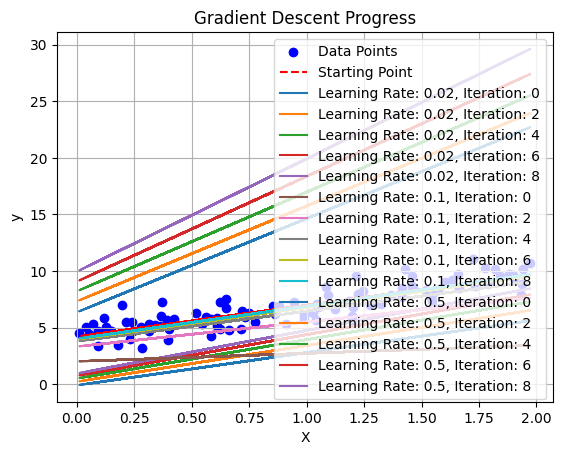

In [14]:

# Define learning rates
etas = [0.02, 0.1, 0.5]


# Plot data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plot starting point with dashed line
plt.plot(X, X_b.dot(theta), linestyle='--', color='red', label='Starting Point')

# Gradient descent for each learning rate
for eta in etas:
    theta = np.random.randn(2, 1)  # Reset parameters for each learning rate
    for iteration in range(10):
        gradients = 2/X.shape[0] * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if iteration % 2 == 0:  # Plot every 2 iterations for clarity
            plt.plot(X, X_b.dot(theta), label=f'Learning Rate: {eta}, Iteration: {iteration}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent Progress')
plt.grid(True)
plt.legend()
plt.show()


9. Ack! Well that is not what we want. Separate this plot into 3 plots (1 per eta) and interpret below your new plot.
10. Reflection: as you are starting to see, Numpy, Pandas, and Sci-kit learn are useful and we may not need to 'hand code' if we use libraries instead. Discuss what you have learned in a few sentences below in a markdown cell.

##9. Ack! Well that is not what we want. Separate this plot into 3 plots (1 per eta) and interpret below your new plot.

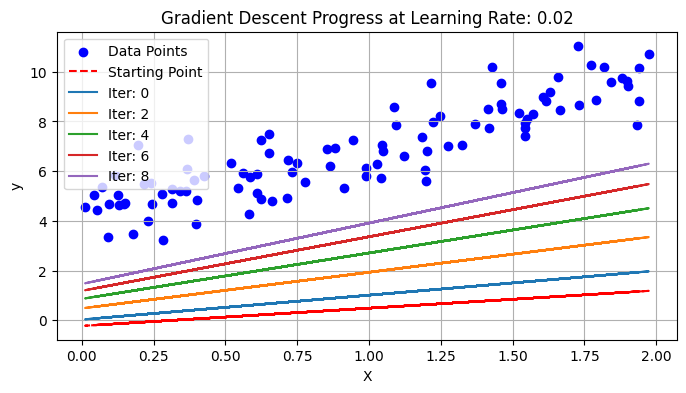

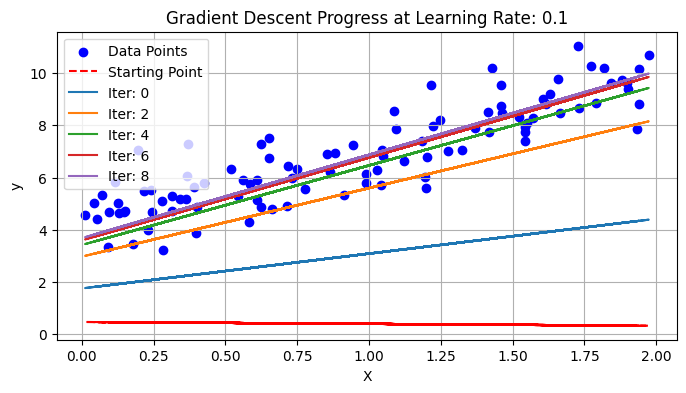

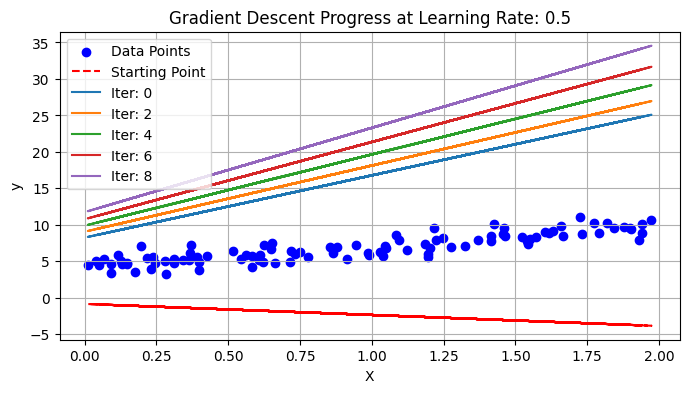

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define learning rates
etas = [0.02, 0.1, 0.5]

# Separate plots for each learning rate
for eta in etas:
    plt.figure(figsize=(8, 4))
    plt.scatter(X, y, color='blue', label='Data Points')

    # Initial theta, random
    theta = np.random.randn(2, 1)

    # Plot starting point
    plt.plot(X, X_b.dot(theta), linestyle='--', color='red', label='Starting Point')

    # Gradient descent iterations
    for iteration in range(10):
        gradients = 2/X.shape[0] * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if iteration % 2 == 0:
            plt.plot(X, X_b.dot(theta), label=f'Iter: {iteration}')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Gradient Descent Progress at Learning Rate: {eta}')
    plt.grid(True)
    plt.legend()
    plt.show()


For learning rate 0.02, there appears to be a very slow rate of convergencew and in the 8 iterations that we graphed, it did not yet reach the optimal line that would bes fit the data points. This learning rate is too slow and would need a lot more iterations for it to reach the best fit. For learnign rate 0.1 it apears to be converging towards the best fit as the iterations progress and is the best learning rate for this data. For learning rare 0.5, it appears that the learning rate is too fast and therefore overshoots and passes the optimal fit wihtout trying it.

##10. Reflection: as you are starting to see, Numpy, Pandas, and Sci-kit learn are useful and we may not need to 'hand code' if we use libraries instead. Discuss what you have learned in a few sentences below in a markdown cell.

I learned that it is a lot simpler to use libraries rather than handcoding. However, handcoding is beneficial to learn the process and understand what the libraries do. Techniques like linear regression or gradient descent can be implemented using these libraries instead of relying on the normal equation. Furthermore, the mean squared error class can be used instead of manually looping through and calculating the MSE, which simplifies the process and reduces the potential for errors in implementation.


## Stochastic Gradient Descent
Batch gradient descent using the whole training set to compute the gradients at every step. Stochastic gradient descent picks a random instance in the training set at every step and computes the gradients only on that single instance. As you can imagine, this makes the cost function bounce around, and while this is good to escape local optima, the algorithm may never settle at the minimum.
One solution is to gradually reduce the learning rate. Here is a simple learning schedule to get an idea of how SGD is done by hand:

In [16]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients

##11. As you did above, plot the first 10 steps of training to notice how irregular they are.

You can also perform linear regression using SGD with scikit learn, as below:

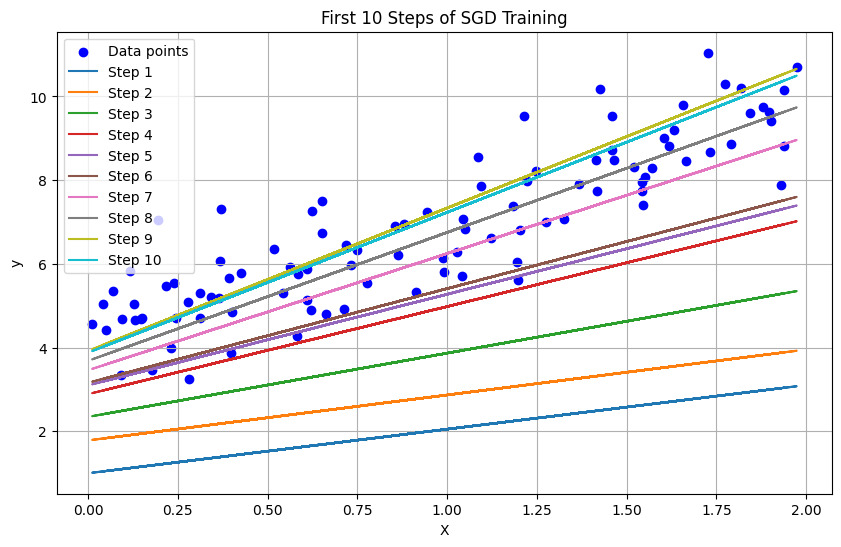

In [17]:

n_epochs = 50
t0, t1 = 5, 50  # Learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

# Random initialization of theta
theta = np.random.randn(2,1)

m = len(X_b)  # Number of instances

# Setup plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        if epoch == 0 and i < 10:  # Plot the first 10 steps
            plt.plot(X, X_b.dot(theta), label=f'Step {i+1}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('First 10 Steps of SGD Training')
plt.legend()
plt.grid(True)
plt.show()

Slowly starting to reach the best fit line, but seems to overshoot.

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())


SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1984328]), array([2.77192957]))

11. How does this result compare to earlier results?
12. Plot the SGDRegressor, use 10 steps to view its behavior.


##11. How does this result compare to earlier results?

it gave the very similar results as before. with an intercept of 4.198 inestad of 4.215 as before, and 2.7719 instead of 2.7701 as before.

##12. Plot the SGDRegressor, use 10 steps to view its behavior.

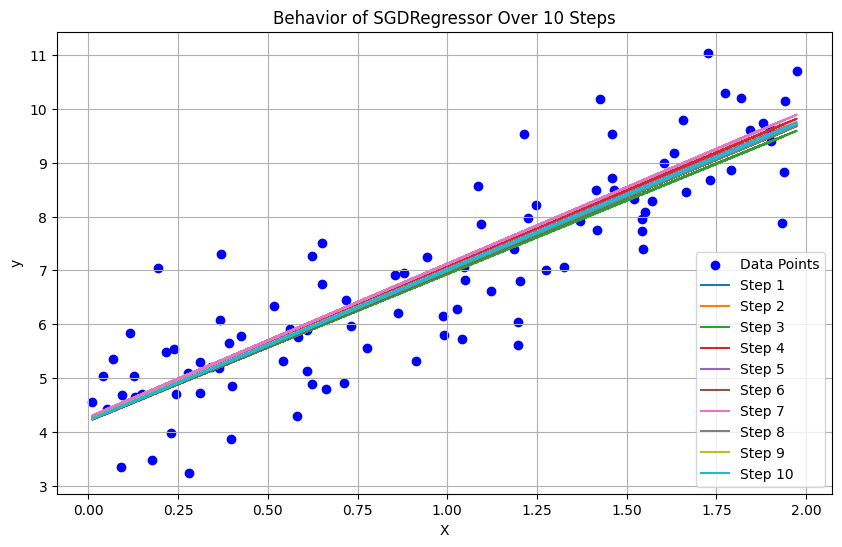

In [20]:
# Setup plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')

# Train the model incrementally and plot each step
for step in range(10):
    sgd_reg.fit(X, y.ravel())
    y_pred = sgd_reg.predict(X)
    plt.plot(X, y_pred, label=f'Step {step + 1}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Behavior of SGDRegressor Over 10 Steps')
plt.legend()
plt.grid(True)
plt.show()

Changing in a very small manner to reach the best fit line.

![Gradient Descent Vizualization](batch.png)

## Mini-batch gradient descent
The GD is computed on small random sets of instances called mini-batches. One advantage is a performance boost of matrix operations, especially when using GPUs. The algorithm's progress is less erratic than with SGD, but it may be harder to escape from local minima, so you might need to think about a good learning rate strategy. In any case, all of these algorithms will end up with very similar models and make predictions in the same way.

## Polynomial Regression
What if your data is more complex than a straight line? You can use a linear model to fit non-linear data, using polynomial regression. While this will seem like a very cool new tool to add to your toolbox, be very careful with this one! We will be using this example to demonstrate the dangers of overfitting your data to a model. First, let's generate some non-linear data based on a simple quadratic equation and a bit of noise thrown in, as before:


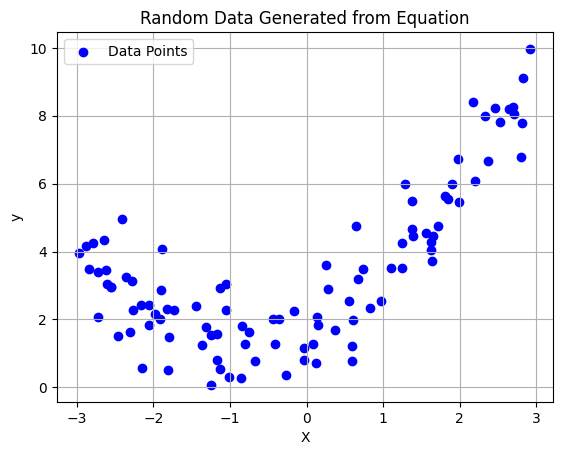

In [21]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Plot data points
plt.scatter(X, y, color='blue', label='Data Points')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Random Data Generated from Equation')
plt.grid(True)
plt.legend()
plt.show()

We can see a straight line will not fit this data. We can try scikit-learn's PolynomialFeatures class to transform our training data,
adding the square (second-degree polynomial) of each feature in the training set as new features (in this case there is just one feature).
The quadratic equation takes the form $y = ax^2 + bx +c$

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-0.75275929,  0.56664654])

X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this
extended training data.

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

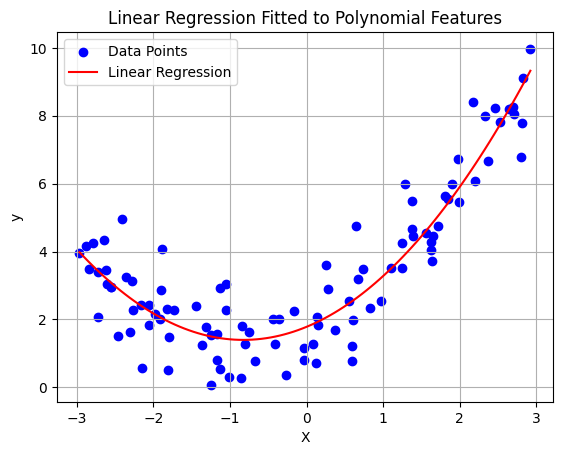

In [24]:

intercept = lin_reg.intercept_
coefficients = lin_reg.coef_

# Plot data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the linear regression line
X_range = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
X_poly_range = poly_features.transform(X_range)
y_pred = np.dot(X_poly_range, coefficients.T) + intercept
plt.plot(X_range, y_pred, color='red', label='Linear Regression')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fitted to Polynomial Features')
plt.grid(True)
plt.legend()
plt.show()


Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something Lin Reg cannot do). This is made possible by the fact that PolynomialFeatures also adds all the combinations of features up to the given degree. For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the features $a^2, a^3, b^2, b^3,$ but also the combinations of $ab, a^2b, ab^2$.

## Learning Curves
Let's say you wanted to perform a really high degree Polynomial Regression and really make sure the line goes through many data points. Let's try a 30 degree polynomial.

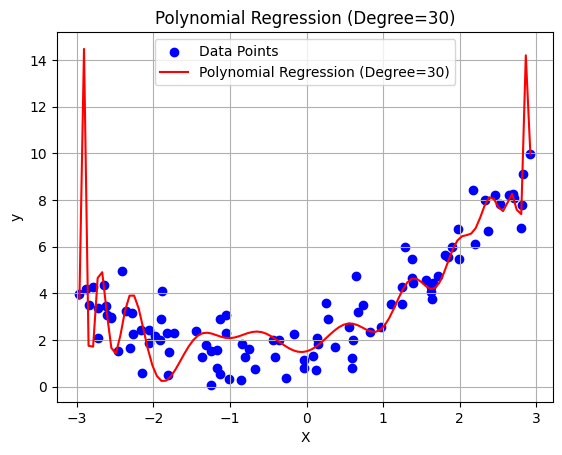

In [25]:
# Define the degree of the polynomial
degree = 30

# Generate polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit linear regression model to polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Get intercept and coefficients
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_

# Plot data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the fitted polynomial curve
X_range = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
X_poly_range = poly_features.transform(X_range)
y_pred = np.dot(X_poly_range, coefficients.T) + intercept
plt.plot(X_range, y_pred, color='red', label='Polynomial Regression (Degree=30)')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree=30)')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (Degree=30):", mse)

Mean Squared Error (Degree=30): 10.756780986911526


This might seem like the 30 degree solution might be fitting to the curve, but is it really? How can we know? We have likely overfit our model to this data.
13. What is overfitting? What is happening with the above 30 degree model we have created? Why is the MSE low?

As we continue on our data science journey, we will begin to separate our data into training and test sets. The training set is used to create a model. The test set is set aside and then the model is tried out on it, and this data in the test set has never been seen before by the model. Building good models to use on future, unseen data is the special skill of the data scientist, and we will be exploring this in depth as we go through the course. For now, read the code below carefully, and try to see what is happening.
15. Interpret the graph below. What is happening in the iterations? Notice that each time you run this you will get different results. You may plot the data as well if you want to see the plots and the degree predictions.


##13. What is overfitting? What is happening with the above 30 degree model we have created? Why is the MSE low?

Overfitting occurs when the model starts also intepreting the nois and random fluctuations in the training data and taking that into account instead of just the underlying patterns of the training data. It becomes too complex and catches random patterns that dont actually represent the underlying data distribution

In the plot, the polynomial regression line of degree 30 closely follows the ups and downs of the blue data points. The wiggly line is the model reacting to the noise in the data as well as the actual signal. This is an example of overfitting.

The Mean Squared Error (MSE) of this model on the training data is low because the model's complexity allows it to fit nearly every point in the training set very closely. However, a low MSE on this training set does not guarantee that the model will perform well on new data. It likely wouldnt perform at all on new data.

##15. Interpret the graph below. What is happening in the iterations? Notice that each time you run this you will get different results. You may plot the data as well if you want to see the plots and the degree predictions.


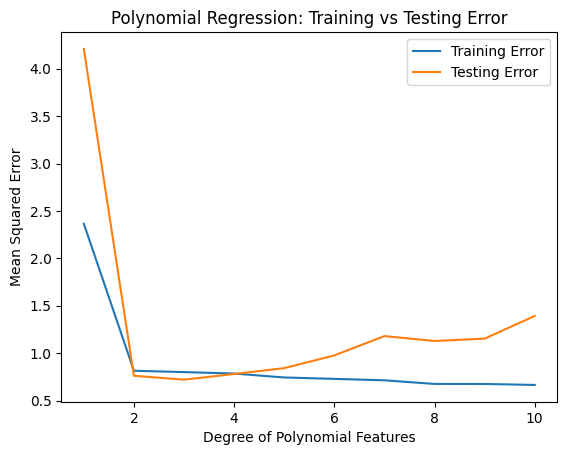

Best degree of polynomial features: 3


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Generate random data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(1, 11)  # Test polynomial degrees from 1 to 10
train_errors = []
test_errors = []

for degree in degrees:
    # Generate polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Fit linear regression model to polynomial features
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)

    # Calculate MSE on training set
    train_predictions = lin_reg.predict(X_poly_train)
    train_error = mean_squared_error(y_train, train_predictions)
    train_errors.append(train_error)

    # Calculate MSE on testing set
    test_predictions = lin_reg.predict(X_poly_test)
    test_error = mean_squared_error(y_test, test_predictions)
    test_errors.append(test_error)

# Plot training and testing errors for each degree
plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, test_errors, label='Testing Error')
plt.xlabel('Degree of Polynomial Features')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Regression: Training vs Testing Error')
plt.legend()
plt.show()

# Find the degree with the lowest testing error
best_degree = degrees[np.argmin(test_errors)]
print("Best degree of polynomial features:", best_degree)


The greaph shows the MSE for both the trainign and testing sets. The training error decreases sharply as the degree of the polynomial increases initilly and then levels off. This suggests that as the model becomes more complex, it fits the training data better which is the behavior of overfitting.  The Testing error increases sharply initially, stabilizes from 2 to 3 and then starts to increase again as the degree of polynomial feautures increases. Thefore it seems that the optimal degree of polynomial feautures is 3. Which gives the best balance between bias and variance without overfittin gthe data.

Between each iteration, the MSE increases or decreases seemingly randomly but seems to keep the same trend